In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv("../datasets/weight_height.csv",
                 encoding="euc-kr",
                 usecols=["학교명", "학년", "성별", "키", "몸무게"])
                 
df

,학교명,학년,성별,키,몸무게
0,서울대도초등학교,1,남,125.8,27.3
1,서울대도초등학교,1,남,124.3,25.4
2,서울대도초등학교,1,남,119.2,23.5
3,서울대도초등학교,1,남,115.0,20.0
4,서울대도초등학교,1,남,120.0,33.5
...,...,...,...,...,...
9681,세종과학고등학교,3,남,176.1,50.4
9682,세종과학고등학교,3,남,174.1,88.8
9683,세종과학고등학교,3,남,169.5,63.2
9684,세종과학고등학교,3,여,159.2,52.9


In [4]:
# df["학교명"] -> 초등학교=0, 중학교=6, 고등학교=9 + df["학년"]
df["grade"] = df["학교명"].map(lambda x : 0 if x.endswith("초등학교")
                            else 6 if x.endswith("중학교")
                            else 9) + df["학년"]
df

,학교명,학년,성별,키,몸무게,grade
0,서울대도초등학교,1,남,125.8,27.3,1
1,서울대도초등학교,1,남,124.3,25.4,1
2,서울대도초등학교,1,남,119.2,23.5,1
3,서울대도초등학교,1,남,115.0,20.0,1
4,서울대도초등학교,1,남,120.0,33.5,1
...,...,...,...,...,...,...
9681,세종과학고등학교,3,남,176.1,50.4,12
9682,세종과학고등학교,3,남,174.1,88.8,12
9683,세종과학고등학교,3,남,169.5,63.2,12
9684,세종과학고등학교,3,여,159.2,52.9,12


In [5]:
df.drop(["학교명", "학년"], axis="columns", inplace=True)
df.columns = ["gender", "height", "weight", "grade"]
df

,gender,height,weight,grade
0,남,125.8,27.3,1
1,남,124.3,25.4,1
2,남,119.2,23.5,1
3,남,115.0,20.0,1
4,남,120.0,33.5,1
...,...,...,...,...
9681,남,176.1,50.4,12
9682,남,174.1,88.8,12
9683,남,169.5,63.2,12
9684,여,159.2,52.9,12


In [6]:
# 남 : 0 / 여 : 1
df["gender"] = df["gender"].map(lambda x : 0 if x == "남" else 1)
df

,gender,height,weight,grade
0,0,125.8,27.3,1
1,0,124.3,25.4,1
2,0,119.2,23.5,1
3,0,115.0,20.0,1
4,0,120.0,33.5,1
...,...,...,...,...
9681,0,176.1,50.4,12
9682,0,174.1,88.8,12
9683,0,169.5,63.2,12
9684,1,159.2,52.9,12


In [7]:
# 몸무게와 키를 통해서 성별 예측하고 싶다


x = df[["weight", "height"]]
y = df[["gender"]]

In [8]:
# 결측값 제거
x = x.dropna()

In [9]:
y = y.loc[x.index]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [11]:
model = LogisticRegression()

In [12]:
model.fit(x_train, y_train)

c:\Users\User\anaconda3\envs\multi02\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [13]:
model.score(x_test, y_test)

0.5353159851301115

In [14]:
model.predict([[160,50]])

c:\Users\User\anaconda3\envs\multi02\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [15]:
# 숙제: 위의 모델을 평가해라

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score, classification_report, precision_recall_curve, roc_curve, roc_auc_score

In [17]:
y_test

,gender
1810,1
8100,0
7661,0
9573,0
4903,1
...,...
553,0
6399,1
1377,1
7260,0


In [18]:
x_test

,weight,height
1810,42.6,149.0
8100,81.8,176.3
7661,57.0,166.2
9573,59.0,164.0
4903,55.0,155.8
...,...,...
553,23.1,114.4
6399,44.0,162.1
1377,42.1,148.7
7260,73.7,174.1


In [19]:
y_test["predict"] = model.predict(x_test)

In [20]:
y_test

,gender,predict
1810,1,1
8100,0,0
7661,0,0
9573,0,0
4903,1,0
...,...,...
553,0,1
6399,1,0
1377,1,1
7260,0,0


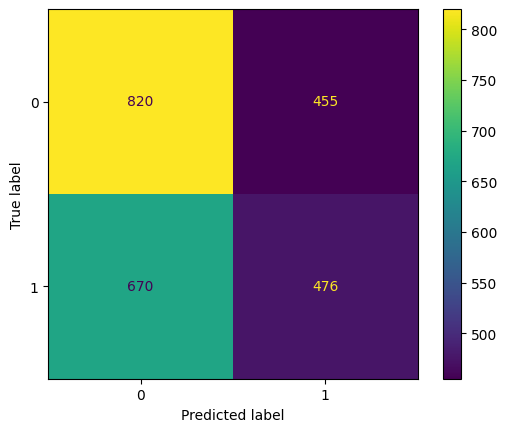

In [21]:
cm = confusion_matrix(y_test["gender"], y_test["predict"])
ConfusionMatrixDisplay(cm).plot()

In [22]:
# 남학생 기준 (남학생이 맞다 / 틀리다)
TP, FN, FP, TN = cm.ravel()

In [23]:
cm

array([[820, 455],
       [670, 476]])

In [24]:
TN

np.int64(476)

In [25]:
FP

np.int64(670)

In [26]:
FN

np.int64(455)

In [27]:
TP

np.int64(820)

In [28]:
# 정확도
# 모델이 전체 예측 중 얼마나 맞췄는지
my_accuracy = (TP + TN) / (TP + TN + FP + FN)
my_accuracy

np.float64(0.5353159851301115)

In [29]:
# 정밀도
# 모델이 positive라고 예측한것 중에 실제로 positive 인 값 비율
my_precision = TP / (TP + FP)
my_precision

np.float64(0.5503355704697986)

In [30]:
# 재현율
# 모델이 실제 positive 값 중에서 모델이 positive로 정답을 맞춘 비율
my_recall = TP / (TP + FN)
my_recall

np.float64(0.6431372549019608)

In [31]:
# f1 점수
my_f1_score = 2 * ((my_precision * my_recall) / (my_precision + my_recall))
my_f1_score

np.float64(0.593128390596745)

In [32]:
accuracy = accuracy_score(y_test["gender"], y_test["predict"])
accuracy

0.5353159851301115

In [33]:
precision = precision_score(y_test["gender"], y_test["predict"], average=None)[0]
precision

np.float64(0.5503355704697986)

In [34]:
recall = recall_score(y_test["gender"], y_test["predict"], average=None)[0]
recall

np.float64(0.6431372549019608)

In [35]:
f1 = f1_score(y_test["gender"], y_test["predict"], average=None)[0]
f1

np.float64(0.593128390596745)

In [36]:
print(classification_report(y_test["gender"], y_test["predict"]))
# support 값은 각 클래스의 샘플 개수

              precision    recall  f1-score   support

           0       0.55      0.64      0.59      1275
           1       0.51      0.42      0.46      1146

    accuracy                           0.54      2421
   macro avg       0.53      0.53      0.53      2421
weighted avg       0.53      0.54      0.53      2421



In [37]:
# 각 샘플이 각 클래스에 속할 확률
# 0과 1
proba = model.predict_proba(x_test)
proba

array([[0.46985469, 0.53014531],
       [0.65890686, 0.34109314],
       [0.56398447, 0.43601553],
       ...,
       [0.46753367, 0.53246633],
       [0.6321621 , 0.3678379 ],
       [0.51942437, 0.48057563]], shape=(2421, 2))

In [38]:
x_test

,weight,height
1810,42.6,149.0
8100,81.8,176.3
7661,57.0,166.2
9573,59.0,164.0
4903,55.0,155.8
...,...,...
553,23.1,114.4
6399,44.0,162.1
1377,42.1,148.7
7260,73.7,174.1


In [39]:
# 전체 샘플이 0일 확률
proba[:, 0]

array([0.46985469, 0.65890686, 0.56398447, ..., 0.46753367, 0.6321621 ,
       0.51942437], shape=(2421,))

In [40]:
# 전체 샘플이 1일 확률
proba[:, 1]

array([0.53014531, 0.34109314, 0.43601553, ..., 0.53246633, 0.3678379 ,
       0.48057563], shape=(2421,))

In [41]:
precisions, recalls, thresholds = precision_recall_curve(y_test["gender"], proba[:, 0], pos_label=0)

In [42]:
# 각 임계값에 따라 precision
precisions

array([0.52664188, 0.5268595 , 0.5270773 , ..., 1.        , 1.        ,
       1.        ], shape=(2352,))

In [43]:
precisions, thresholds

(array([0.52664188, 0.5268595 , 0.5270773 , ..., 1.        , 1.        ,
        1.        ], shape=(2352,)),
 array([0.28634313, 0.287581  , 0.29941307, ..., 0.7393755 , 0.74211377,
        0.75166931], shape=(2351,)))

In [44]:
# 각 임계값에 따라 recall
recalls

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       1.56862745e-03, 7.84313725e-04, 0.00000000e+00], shape=(2352,))

In [45]:
recalls, thresholds

(array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.56862745e-03, 7.84313725e-04, 0.00000000e+00], shape=(2352,)),
 array([0.28634313, 0.287581  , 0.29941307, ..., 0.7393755 , 0.74211377,
        0.75166931], shape=(2351,)))

In [46]:
thresholds

array([0.28634313, 0.287581  , 0.29941307, ..., 0.7393755 , 0.74211377,
       0.75166931], shape=(2351,))

In [47]:
import matplotlib.pyplot as plt

C:\Users\User\AppData\Local\Temp\ipykernel_10460\3336547667.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


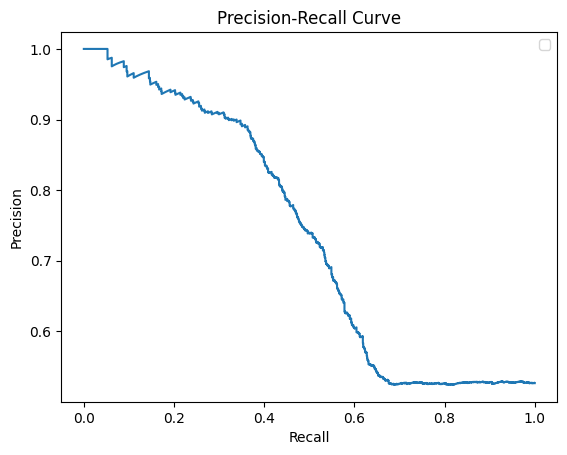

In [48]:
# 반비례 확인 테스트
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

In [49]:
# roc_curve
# x축 == FPR
# negative 값 중에서 positive라고 잘못 판단한 비율
# y축 == TPR
# 모델이 실제 positive 값 중에서 모델이 positive로 정답을 맞춘 비율
fprs, tprs, thresholds = roc_curve(y_test["gender"], proba[:, 0], pos_label=0)

In [50]:
fprs

array([0.       , 0.       , 0.       , ..., 0.9982548, 0.9982548,
       1.       ], shape=(1060,))

In [51]:
tprs

array([0.00000000e+00, 7.84313725e-04, 5.25490196e-02, ...,
       9.99215686e-01, 1.00000000e+00, 1.00000000e+00], shape=(1060,))

In [52]:
thresholds

array([       inf, 0.75166931, 0.66461574, ..., 0.30115132, 0.29941307,
       0.28634313], shape=(1060,))

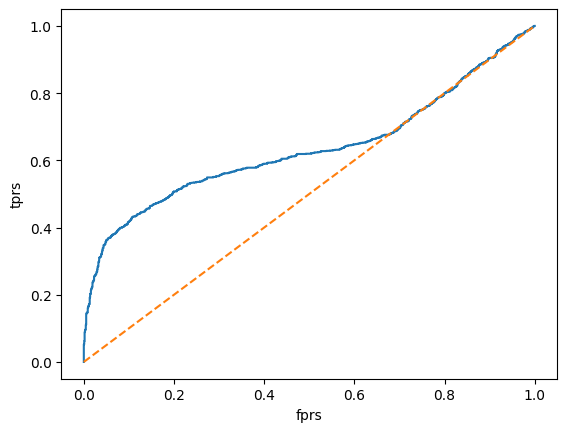

In [53]:
plt.xlabel("fprs")
plt.ylabel("tprs")
plt.plot(fprs, tprs)
plt.plot([0, 1], [0, 1], "--")

In [54]:
# roc_auc_score
roc_auc = roc_auc_score(y_test["gender"] == 0,  proba[:, 0])
roc_auc

0.6344184375320809

In [55]:
# 여학생 기준 (1과 0이 뒤집혔으니까 거꾸로)
TN, FP, FN, TP = cm.ravel()

In [56]:
TN

np.int64(820)

In [57]:
FP

np.int64(455)

In [58]:
FN

np.int64(670)

In [59]:
TP

np.int64(476)

In [60]:
my_accuracy = (TP + TN) / (TP + TN + FP + FN)
my_accuracy

np.float64(0.5353159851301115)

In [61]:
my_precision = TP / (TP + FP)
my_precision

np.float64(0.5112781954887218)

In [62]:
my_recall = TP / (TP + FN)
my_recall

np.float64(0.41535776614310643)

In [63]:
my_f1_score = 2 * ((my_precision * my_recall) / (my_precision + my_recall))
my_f1_score

np.float64(0.45835339431872885)

In [64]:
accuracy = accuracy_score(y_test["gender"], y_test["predict"])
accuracy

0.5353159851301115

In [65]:
precision = precision_score(y_test["gender"], y_test["predict"], average=None)[1]
precision

np.float64(0.5112781954887218)

In [66]:
recall = recall_score(y_test["gender"], y_test["predict"], average=None)[1]
recall

np.float64(0.41535776614310643)

In [67]:
f1 = f1_score(y_test["gender"], y_test["predict"], average=None)[1]
f1

np.float64(0.45835339431872896)

In [68]:
precisions, recalls, thresholds = precision_recall_curve(y_test["gender"], proba[:, 1])

In [69]:
precisions

array([0.47335812, 0.47355372, 0.47374948, ..., 1.        , 1.        ,
       1.        ], shape=(2352,))

In [70]:
recalls

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       1.74520070e-03, 8.72600349e-04, 0.00000000e+00], shape=(2352,))

In [71]:
thresholds

array([0.24833069, 0.25788623, 0.2606245 , ..., 0.70058693, 0.712419  ,
       0.71365687], shape=(2351,))

In [72]:
fprs, tprs, thresholds = roc_curve(y_test["gender"], proba[:, 1])

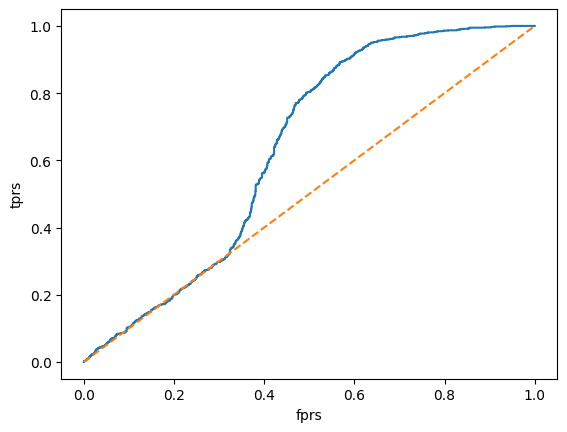

In [73]:
plt.xlabel("fprs")
plt.ylabel("tprs")
plt.plot(fprs, tprs)
plt.plot([0, 1], [0, 1], "--")

In [74]:
# roc_auc_score
roc_auc = roc_auc_score(y_test["gender"] == 1,  proba[:, 1])
roc_auc

0.6344184375320809